# Tarea 1B
***Autores:** Pablo Montes, Joaquín Pelle y Oscar Reula*
### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia.

### Importante 2: ###
Renombre el archivo como (según corresponda): 
**apellido_nombre_tarea_1.ipynb** o **grupo_tarea_1.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**El objetivo de las primeras tareas (A y B) es variado:**

1. Construir algunos integradores simples y aplicarlos a problemas en 1 y 2 dimensiones.
2. Estudiar convergencia y determinar el factor Q del método.
3. Estudia la región de convergencia de los métodos.
4. Comprobar cualitativa y cuantitativamente los errores de la aproximación.
5. Familiarizarse con las librerías de integradores de ODEs.
6. Familiarizarse con el manejo y estudio de soluciones para casos de complejidad media.
7. Estudiar el caso stiff y los métodos IMEX.

### Nota importante
A partir de ahora utilizaremos el paquete `DifferentialEquations`, que tiene ya implementados los integradores de Euler, Runge-Kutta, y otros. Haga todos los ejercicios utilizando este paquete.

In [1]:
#=
using Pkg
Pkg.add("DifferentialEquations")
=#

using DifferentialEquations

## Problema 1
En el directorio `Dipolo_mag_3d` encontrará un notebook de Julia que realiza una integración de una partícula cargada en presencia de un dipolo magnético. Este notebook utiliza `DifferentialEquations` para resolver dicho problema. Juegue con las soluciones y la librería, y trate de entender cómo funciona. Ejecute distintas condiciones initiales, cambie las tolerancias, cambie los métodos, etc. La idea es únicamente que se familiarize con el paquete, no hace falta que presente nada respecto a este ejercicio.


*Nota: si quiere probar otros métodos además de Euler y Runge Kutta, puede consultar los métodos disponibles en el paquete en 
https://diffeq.sciml.ai/stable/solvers/ode_solve/*

*Puede consultar también https://diffeq.sciml.ai/stable/tutorials/ode_example/ para un pequeño tutorial del paquete.*

## Problema 2
**Estabilidad numérica**

***2a)***
Volvamos nuevamente la ecuación del notebook anterior

$$
\frac{dy}{dt} = \lambda y
$$

Resuelva la ecuación con $\lambda = -1$ en el intervalo temporal $[0,20]$, con $N = 100, 50, 30, 20, 10, 5$ (es decir, para $\Delta t$ creciente). Experimente nuevamente con Euler y Runge-Kutta y grafique. ¿Qué observa?

*Nota: utilice en la función `solve` los argumentos opcionales `saveat = dt` y `adaptive = false`.
Ejemplo:*
```julia
sol = solve(prob, RK4(), dt = dt, saveat = dt, adaptive = false)
```
*Puede averiguar más sobre estas opciones en https://diffeq.sciml.ai/stable/basics/common_solver_opts/ o preguntar en clases o en el aula virtual.*

In [1]:
#λ=-1.
CrecimientoExponencial(y, t, λ) = -1. *(y) 
u0 =1.0 #Datos iniciales
T=20.
tspan = (0.0,T)

prob = ODEProblem(CrecimientoExponencial,u0,tspan)

LoadError: UndefVarError: ODEProblem not defined

In [2]:
N=[5,10,20,30,50,100,200,300]
dt=zeros(length(N))

8-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [3]:
for i in 1:length(N)
   dt[i]= T/N[i] 
end

In [114]:
dt

8-element Vector{Float64}:
 4.0
 2.0
 1.0
 0.6666666666666666
 0.4
 0.2
 0.1
 0.06666666666666667

***Euler***

In [115]:
sol1= solve(prob,  Euler(), dt = dt[1], saveat = dt, adaptive = false)
sol2= solve(prob,  Euler(), dt = dt[2], saveat = dt, adaptive = false)
sol3= solve(prob,  Euler(), dt = dt[3], saveat = dt, adaptive = false)
sol4= solve(prob,  Euler(), dt = dt[4], saveat = dt, adaptive = false)
sol5= solve(prob,  Euler(), dt = dt[5], saveat = dt, adaptive = false)
sol6= solve(prob,  Euler(), dt = dt[6], saveat = dt, adaptive = false)
sol7= solve(prob,  Euler(), dt = dt[7], saveat = dt, adaptive = false)
sol8= solve(prob,  Euler(), dt = dt[8], saveat = dt, adaptive = false)

retcode: Success
Interpolation: 1st order linear
t: 8-element Vector{Float64}:
 0.06666666666666667
 0.1
 0.2
 0.4
 0.6666666666666666
 1.0
 2.0
 4.0
u: 8-element Vector{Float64}:
 0.9333333333333333
 0.9017037037037038
 0.8130370370370371
 0.6610292235939642
 0.5016118252560146
 0.35526436649414417
 0.1262127701004856
 0.01592966333643813

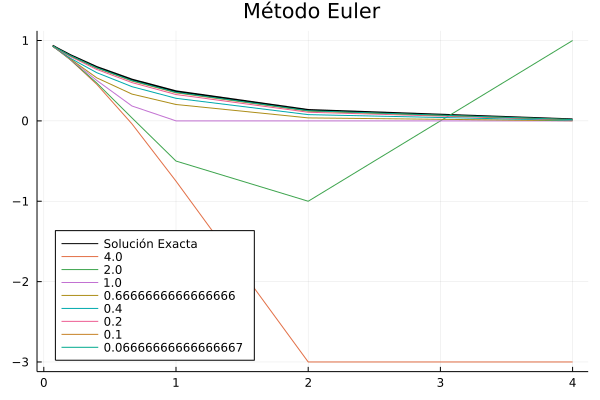

In [120]:
using Plots
gr()
plt = plot()
plot!(plt, sol8.t, u0*exp.(-1. *sol8.t), label = "Solución Exacta", lw=2, color= :black)
plot!(plt, sol1.t, sol1.u, label = string(dt[1]), title= "Método Euler")
plot!(plt, sol2.t, sol2.u, label = string(dt[2]))
plot!(plt, sol3.t, sol3.u, label = string(dt[3]))
plot!(plt, sol4.t, sol4.u, label = string(dt[4]))
plot!(plt, sol5.t, sol5.u, label = string(dt[5]))
plot!(plt, sol6.t, sol6.u, label = string(dt[6]))
plot!(plt, sol7.t, sol7.u, label = string(dt[7]))
plot!(plt, sol8.t, sol8.u, label = string(dt[8]))
plot!(plt, legend = :bottomleft)

***Heun***

In [121]:
solH1= solve(prob,  Heun(), dt = dt[1], saveat = dt, adaptive = false)
solH2= solve(prob,  Heun(), dt = dt[2], saveat = dt, adaptive = false)
solH3= solve(prob,  Heun(), dt = dt[3], saveat = dt, adaptive = false)
solH4= solve(prob,  Heun(), dt = dt[4], saveat = dt, adaptive = false)
solH5= solve(prob,  Heun(), dt = dt[5], saveat = dt, adaptive = false)
solH6= solve(prob,  Heun(), dt = dt[6], saveat = dt, adaptive = false)
solH7= solve(prob,  Heun(), dt = dt[7], saveat = dt, adaptive = false)
solH8= solve(prob, Heun(), dt = dt[8], saveat = dt, adaptive = false)

retcode: Success
Interpolation: 1st order linear
t: 8-element Vector{Float64}:
 0.06666666666666667
 0.1
 0.2
 0.4
 0.6666666666666666
 1.0
 2.0
 4.0
u: 8-element Vector{Float64}:
 0.9355555555555556
 0.9049074485596709
 0.8188582825788753
 0.6705288869480249
 0.5136837420062562
 0.36816604393548247
 0.13554623590710355
 0.018372782068584278

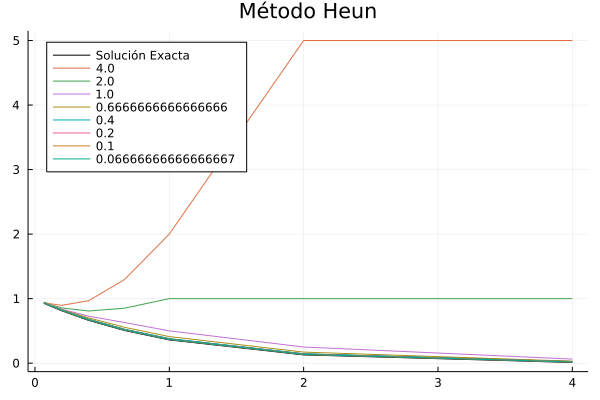

In [123]:
using Plots
gr()
plt = plot()
plot!(plt, solH8.t, u0*exp.(-1. *solH8.t), label = "Solución Exacta",lw=2, color= :black)
plot!(plt, solH1.t, solH1.u, label = string(dt[1]), title= "Método Heun")
plot!(plt, solH2.t, solH2.u, label = string(dt[2]))
plot!(plt, solH3.t, solH3.u, label = string(dt[3]))
plot!(plt, solH4.t, solH4.u, label = string(dt[4]))
plot!(plt, solH5.t, solH5.u, label = string(dt[5]))
plot!(plt, solH6.t, solH6.u, label = string(dt[6]))
plot!(plt, solH7.t, solH7.u, label = string(dt[7]))
plot!(plt, solH8.t, solH8.u, label = string(dt[8]))
plot!(plt, legend = :topleft)

***RK4***

In [124]:
solRK41= solve(prob,  RK4(), dt = dt[1], saveat = dt, adaptive = false)
solRK42= solve(prob,  RK4(), dt = dt[2], saveat = dt, adaptive = false)
solRK43= solve(prob,  RK4(), dt = dt[3], saveat = dt, adaptive = false)
solRK44= solve(prob,  RK4(), dt = dt[4], saveat = dt, adaptive = false)
solRK45= solve(prob,  RK4(), dt = dt[5], saveat = dt, adaptive = false)
solRK46= solve(prob,  RK4(), dt = dt[6], saveat = dt, adaptive = false)
solRK47= solve(prob,  RK4(), dt = dt[7], saveat = dt, adaptive = false)
solRK48= solve(prob, RK4(), dt = dt[8], saveat = dt, adaptive = false)

retcode: Success
Interpolation: 1st order linear
t: 8-element Vector{Float64}:
 0.06666666666666667
 0.1
 0.2
 0.4
 0.6666666666666666
 1.0
 2.0
 4.0
u: 8-element Vector{Float64}:
 0.9355069958847737
 0.9048373871459353
 0.8187307815731597
 0.6703200926953968
 0.5134171785959778
 0.3678795051899904
 0.1353353303388322
 0.018315651637920937

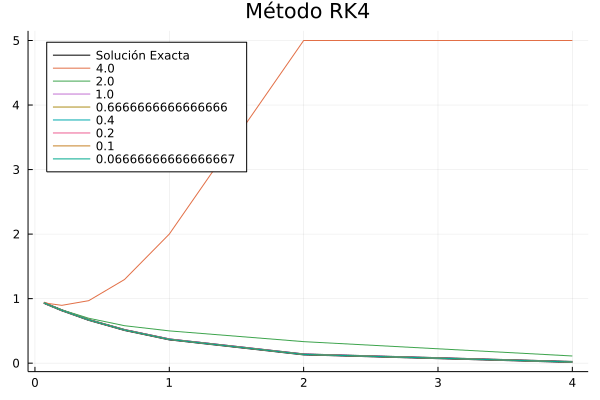

In [125]:
using Plots
gr()
plt = plot()
plot!(plt, solRK48.t, u0*exp.(-1. *solH8.t), label = "Solución Exacta", lw=2, color= :black)
plot!(plt, solRK41.t, solRK41.u, label = string(dt[1]), title= "Método RK4")
plot!(plt, solRK42.t, solRK42.u, label = string(dt[2]))
plot!(plt, solRK43.t, solRK43.u, label = string(dt[3]))
plot!(plt, solRK44.t, solRK44.u, label = string(dt[4]))
plot!(plt, solRK45.t, solRK45.u, label = string(dt[5]))
plot!(plt, solRK46.t, solRK46.u, label = string(dt[6]))
plot!(plt, solRK47.t, solRK47.u, label = string(dt[7]))
plot!(plt, solRK48.t, solRK48.u, label = string(dt[8]))
plot!(plt, legend = :topleft)

***2b)*** Use el notebook *region_de_estabilidad* para investigar la región de convergencia de varios métodos de las librerías. Simplemente lea el notebook, entiéndalo, y corra los ejemplos, no hace falta que agregue nada. Pregunte en clase todas sus dudas.

## Problema 3
Construya su propio código para su ecuación favorita (alguna que no sea muy complicada, en la página del paquete DifferentialEquations de Julia hay varios ejemplos, o puede usar el dipolo 2D (orbitas coplanares)). Evolucione con distintas tolerancias, con paso fijo (vea como se hace esto en cada caso, use métodos fijos o adaptativos). Grafique diferencias de soluciones con distinta resolución o tolerancia y/o con distintos datos iniciales muy próximos.
Estudie convergencia, encuentre soluciones con distintos pasos (fijos), haga los cocientes y grafique el factor $Q$.

In [126]:
#Función auxiliar para calcular el factor Q.
#Simplemente calcule tres soluciones con distintos dt
#Si sol_1 usa N+1 puntos, sol_2 debe usar 2N+1 y sol4 usar 4N+1.
#No olvide utilizar `adaptive = false` y `saveat = dt` 
using LinearAlgebra

function Q(t,sol_1,sol_2,sol_4)
    return norm(sol_1(t)[:] - sol_2(t)[1:2:end],2)/norm(sol_2(t)[1:2:end]-sol_4(t)[1:4:end],2)
end

Q (generic function with 1 method)

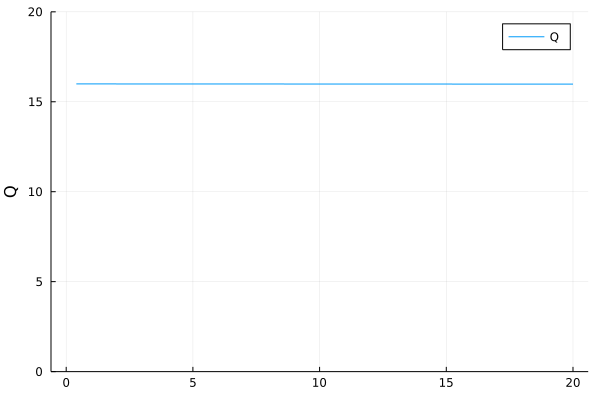

In [127]:
#Ejemplo simple
using Plots
λ = -im
T = (0.0,20.0)
N = 51
dt = (T[2]-T[1])/(N-1)
function CrecimientoExponencial!(du, u, par, t)
    λ = par
    du .= λ*u
end
y0 = [1.0+ 1.0im]
prob = ODEProblem(CrecimientoExponencial!,y0,T,λ);
#t = T[1]:dt:T[2]

sol_1 = solve(prob, RK4(), dt = dt  , saveat = dt,   adaptive = false);
sol_2 = solve(prob, RK4(), dt = dt/2, saveat = dt/2, adaptive = false);
sol_4 = solve(prob, RK4(), dt = dt/4, saveat = dt/4, adaptive = false);
plot(sol_1.t,map(t -> Q(t,sol_1,sol_2,sol_4),sol_1.t), yaxis=("Q",(0.,20)), label="Q")

###  Van der Pol Equations ###
 El oscilador de van der Pol es un oscilador con amortiguamiento no lineal. Su evolución temporal obedece a una ecuación diferencial de segundo orden:
\begin{equation}
\frac{dx^2}{dt^2} -\mu(1-x^2)\frac{dx}{dt}+x=0
\end{equation}
Cuya forma bidimensional es
\begin{equation}
\frac{dx}{dt}= y
\end{equation}
\begin{equation}
\frac{dy}{dt}=\mu ((1-x^2)y-x)
\end{equation}

In [185]:
u0= [0.0; sqrt(3)]
μ=1.


1-element Vector{Float64}:
 1.0

In [187]:
function f(du, u, μ, t)   # aca definen la f(u) de la ode 
    x=u[1]
    y=u[2]
    
    du[1] =y
    du[2] = μ*((1. -x^2)*y-x)
   
end


f (generic function with 2 methods)

In [204]:
T=20.
tspan = (0.0,T)
dt=T/400
prob3 = ODEProblem(f,u0,tspan,μ)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 20.0)
u0: 2-element Vector{Float64}:
 0.0
 1.7320508075688772

In [224]:
solE=solve(prob3, Euler(), adaptive = false,  dt = dt,saveat = dt)
solRK4=solve(prob3, RK4(),  dt = dt,saveat = dt, adaptive = true)

retcode: Success
Interpolation: 1st order linear
t: 401-element Vector{Float64}:
  0.0
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35
  0.4
  0.45
  0.5
  0.55
  0.6
  ⋮
 19.45
 19.5
 19.55
 19.6
 19.65
 19.7
 19.75
 19.8
 19.85
 19.9
 19.95
 20.0
u: 401-element Vector{Vector{Float64}}:
 [0.0, 1.7320508075688772]
 [0.08876427402228546, 1.8183808092657257]
 [0.18180865872235694, 1.9029093332794993]
 [0.2789873602115075, 1.9833490033036163]
 [0.3800289487386403, 2.0568751836774415]
 [0.484506903599306, 2.120136390004111]
 [0.5918081212767827, 2.1693601685512434]
 [0.7011422950362388, 2.2005683063530386]
 [0.811499628385613, 2.209867224529362]
 [0.9217024980011804, 2.1938552290312767]
 [1.0304164790075203, 2.1500834920476177]
 [1.136221591601927, 2.0774390927180835]
 [1.2376796417696738, 1.9764904723450918]
 ⋮
 [-0.7755349240197996, 1.3657877262860978]
 [-0.7055592747991429, 1.4344803124810819]
 [-0.6320150887744442, 1.5086262450634187]
 [-0.5546173543263507, 1.588388074489908]
 [-0.473081

In [216]:
solE.u[:,1]

401-element Vector{Vector{Float64}}:
 [0.0, 1.7320508075688772]
 [0.08660254037844387, 1.818653347947321]
 [0.17753520777580992, 1.9045738933202847]
 [0.27276390244182414, 1.987924338177504]
 [0.3721601193506993, 2.0662872668671777]
 [0.47547448269405823, 2.1366842590214894]
 [0.5823086956451327, 2.19559209805286]
 [0.6920883005477757, 2.2390318246233205]
 [0.8040398917789419, 2.2627557317955187]
 [0.9171776783687178, 2.262550190825832]
 [1.0303051879100096, 2.2346542705356094]
 [1.1420379014367903, 2.17626423356454]
 [1.2508511131150168, 2.0860558569990775]
 ⋮
 [-1.5548740784879604, 0.7773191488357479]
 [-1.5160081210461729, 0.7999651733694855]
 [-1.4760098623776985, 0.8238366152356542]
 [-1.434818031615916, 0.8490882059704252]
 [-1.3923636213173975, 0.8758825051814568]
 [-1.348569496058325, 0.9043921720445053]
 [-1.3033498874560996, 0.9348020806738636]
 [-1.2566097834224064, 0.967311286128528]
 [-1.2082442191159801, 1.0021348175597669]
 [-1.1581374782379954, 1.0395052386345673]
 [-1.

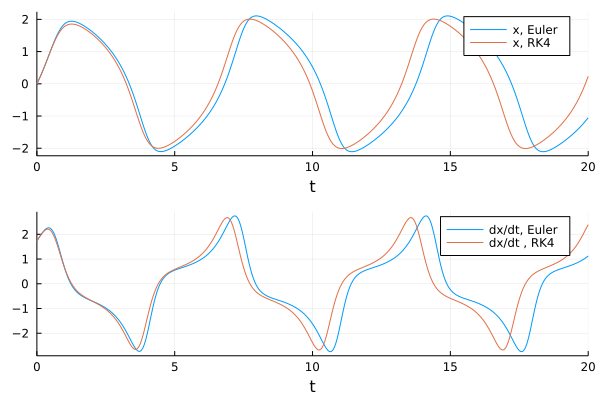

In [225]:
plot(solE,layout=(2,1),label=["x, Euler" "dx/dt, Euler"])
plot!(solRK4,layout=(2,1),label=["x, RK4" "dx/dt , RK4"])

## Problema 4
**Opcional para personas ambiciosas** 
Busque una ecuación que sea stiff y evolucione con un método apropiado. Un caso simple es la ecuación: 

\begin{eqnarray}
u_t &=& v \\
v_t &=& \frac{1}{\epsilon}(u - v)
\end{eqnarray}
con $\epsilon > 0$ muy pequeño. Este permite usar métodos IMEX.